In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:20:04) [GCC 11.3.0]

---------------------------------
Python interpreter: /home/imarevic/anaconda3/envs/srh/bin/python


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

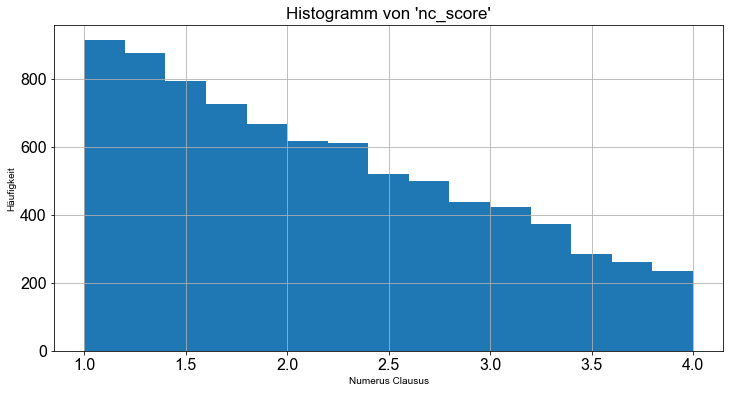

In [3]:
# Lese Daten ein
df = pd.read_csv("../../data/students.csv")

# Histogramm
df["nc_score"].hist(bins=15)
plt.xlabel("Numerus Clausus")
plt.ylabel("Häufigkeit")
plt.title("Histogramm von 'nc_score'")
plt.show()

In [4]:
for e, q in enumerate([0.25, 0.5, 0.75, 1]):
    print(f"{e+1}. Quantil des nc_score: {np.quantile(df['nc_score'], q)}")

1. Quantil des nc_score: 1.46
2. Quantil des nc_score: 2.04
3. Quantil des nc_score: 2.78
4. Quantil des nc_score: 4.0


In [5]:
# Berechne Interquartil Abstand mit Funktion np.percentile()
q1, q3 = np.percentile(df["nc_score"], [25, 75])
iqr = q3 - q1
iqr

1.3199999999999998

In [6]:
stats.iqr(df["nc_score"], rng=(25, 75))

1.3199999999999998

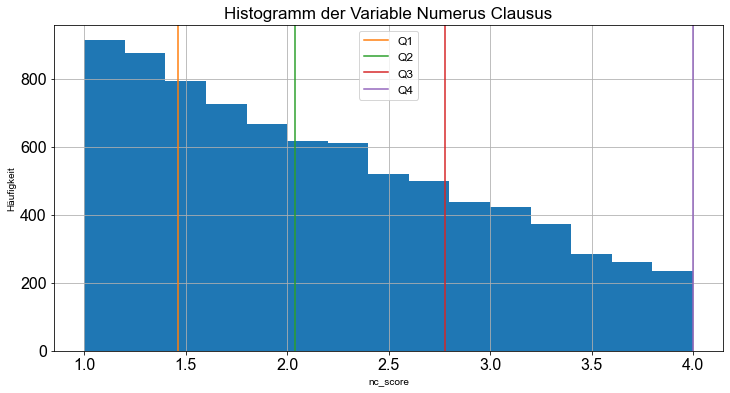

In [7]:
# Plotte die Liste als Histogramm mit Quartilen
df["nc_score"].hist(bins=15)
plt.xlabel("nc_score")
plt.ylabel("Häufigkeit")
plt.title("Histogramm der Variable Numerus Clausus")

# Zeichne vertikale Linien bei Q1, Q2, Q3, Q4
for e, q in enumerate([0.25, 0.5, 0.75, 1]):
    plt.axvline(x=np.quantile(df["nc_score"], q), color=f"C{e+1}", label=f"Q{e+1}")
plt.legend()

In [8]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
df = pd.read_csv("../../data/students.csv", index_col=0)

# Berechne Fünf-Zahlen-Zusammenfassung
scores = df["nc_score"]

# Berechne die Quartilen
q1, median, q3 = np.percentile(scores, [25, 50, 75])

# Berechne minimal/maximal Datenpunkte
data_min, data_max = min(scores), max(scores)

# Ausgabe der Daten
print(f"Min:    {data_min}")
print(f"Q1:     {q1}")
print(f"Median: {median}")
print(f"Q3:     {q3}")
print(f"Max:    {data_max}")

Min:    1.0
Q1:     1.46
Median: 2.04
Q3:     2.78
Max:    4.0


In [9]:
df.describe()

,age,height,weight,nc_score,score1,score2,online_tutorial,graduated,salary
count,8239.000000,8239.000000,8239.000000,8239.000000,4892.000000,4892.000000,8239.000000,8239.000000,1753.000000
mean,22.541571,171.380750,72.998131,2.166481,68.164963,69.494685,0.386212,0.212769,42522.112253
std,6.065111,11.077529,8.635162,0.811548,14.051762,14.395251,0.486910,0.409290,10333.139992
min,18.000000,135.000000,51.400000,1.000000,30.000000,31.000000,0.000000,0.000000,11444.140000
25%,20.000000,163.000000,66.500000,1.460000,58.000000,59.000000,0.000000,0.000000,35206.540000
50%,21.000000,171.000000,71.800000,2.040000,70.000000,71.000000,0.000000,0.000000,41672.010000
75%,23.000000,180.000000,78.500000,2.780000,78.000000,80.000000,1.000000,0.000000,49372.540000
max,64.000000,206.000000,116.000000,4.000000,97.000000,98.000000,1.000000,1.000000,75596.790000


In [10]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
df = pd.read_csv("../../data/students.csv", index_col=0)

scores = df["nc_score"].sort_values()

# Berechne 38-te Perzentile
k = 38
n = len(scores)
print(f"Die {k}-te Perzentile ist {round((k*n)/100)}.")

Die 38-te Perzentile ist 3131.


In [11]:
scores

stud_id
403145    1.0
884117    1.0
832302    1.0
499028    1.0
924359    1.0
         ... 
676841    4.0
679521    4.0
706167    4.0
941727    4.0
806767    4.0
Name: nc_score, Length: 8239, dtype: float64

In [12]:
scores.iloc[3131]

1.74

In [13]:
quartiles = np.percentile(scores, [38, 50, 73])
print(quartiles)

[1.74 2.04 2.71]


In [14]:
# Definiere Funktion my_percentile_rank
def my_percentile_rank(x, data: pd.Series):
    """Computes the percentile rank
    Args:
       x: int or float number
       data: Pandas Series
    """
    return sum(data < x) / len(data)

In [15]:
my_percentile_rank(2.5, scores)

0.6627017841971113

In [16]:
# Lese der Datei students.csv; nur Spalten 'nc_score','semester','gender','height' werden verwendet
students = pd.read_csv(
    "../../data/students.csv", usecols=["nc_score", "semester", "gender", "height"]
)
students

,gender,height,nc_score,semester
0,Female,160,1.91,1st
1,Female,172,1.56,2nd
2,Female,168,1.24,3rd
3,Male,183,1.37,2nd
4,Female,175,1.46,1st
...,...,...,...,...
8234,Male,181,2.91,6th
8235,Male,178,2.03,2nd
8236,Female,169,3.72,3rd
8237,Male,195,2.74,4th


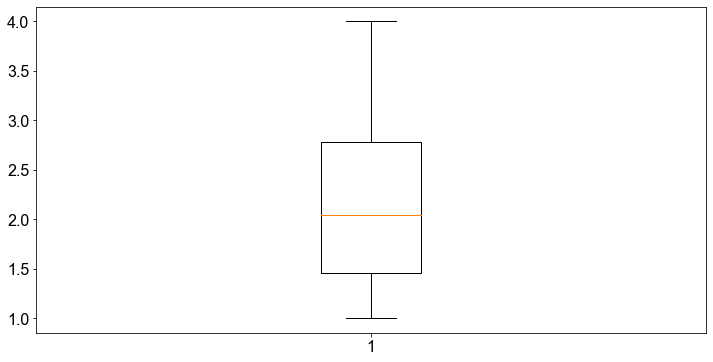

In [17]:
_ = plt.boxplot(students["nc_score"])

Text(0.5, 1.0, 'Numerus Clausus')

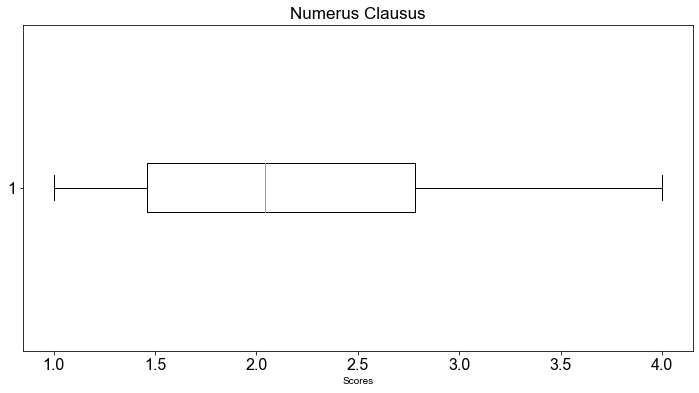

In [18]:
fig, ax = plt.subplots()
ax.boxplot(students["nc_score"], vert=False)
ax.set_xlabel("Scores")
ax.set_title("Numerus Clausus")

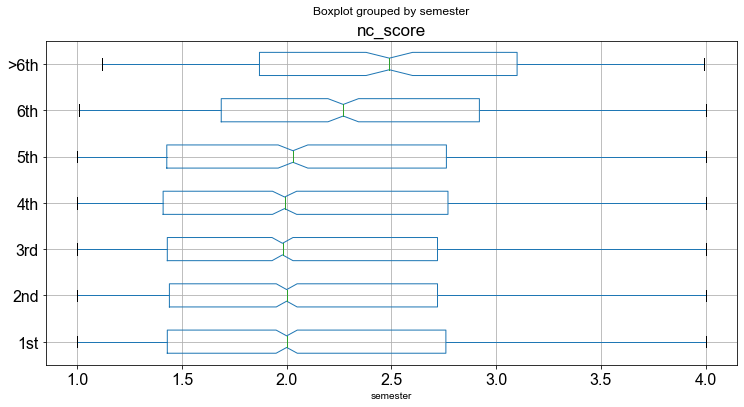

In [19]:
_ = students.boxplot(column="nc_score", by="semester", vert=False, notch=True)

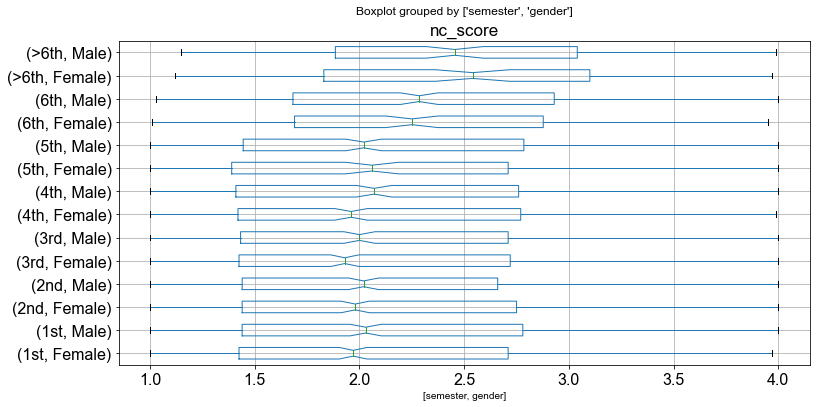

In [20]:
_ = students.boxplot(
    column="nc_score", by=["semester", "gender"], vert=False, notch=True
)

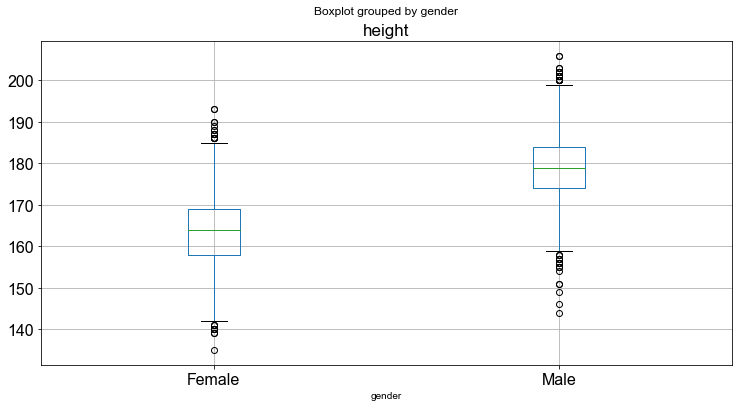

In [21]:
_ = students.boxplot(column="height", by="gender")